In [39]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [40]:
import matplotlib
print(np.__version__)
print(yf.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.23.5
0.1.90
1.5.2
0.13.2
3.10.0


In [2]:
def get_data(ticker, start, end):
    df = yf.download(ticker, start , end).loc[:, ["Open", "Close", "Adj Close"]]
    return df

def get_adj_close(df):
    cp = df["Adj Close"]
    return cp

def get_log_ret(cp):
    ret_df = np.log(cp / cp.shift(1)).dropna()
    return ret_df

def split_data(ret_df, ratio):
    train = ret_df.iloc[:int(len(ret_df) * ratio)]
    test = ret_df.iloc[int(len(ret_df) * ratio):]
    return train, test

In [3]:
look_ahead = ["AAPL", "NVDA", "MSFT", "AMZN", "GOOG", "META", "TSLA"] #2024
top_qqq_2014 = ["AAPL", "MSFT", "GOOG", "AMZN", "QCOM", "INTC", "GILD"] #2014
top_spy_2014 = ["AAPL", "BRK-B", "MSFT", "JNJ", "GOOG", "WFC", "XOM"] #2014
QQQ = ["QQQ"]
SPY = ["SPY"]

start = "2014-01-01"
end = "2024-12-31"

data = ["look_ahead", "top_qqq_2014", "top_spy_2014", "QQQ", "SPY"]
df_returns = {}

for d in data: 
    df_returns[f"{d}_ret"]= get_log_ret(get_adj_close(get_data(eval(d), start, end)))
   
print(df_returns.keys())

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
dict_keys(['look_ahead_ret', 'top_qqq_2014_ret', 'top_spy_2014_ret', 'QQQ_ret', 'SPY_ret'])


In [4]:
def calculate_weights(data):
    """Returns weights based on data type"""
    if isinstance(data, pd.DataFrame):
        # Multiple assets: equal weights
        n_assets = data.shape[1]
        return np.ones(n_assets) / n_assets
    else:
        # Single asset: full weight (1.0)
        return 1.0  # Scalar weight for Series

portfolio_returns = {
    key: (
        df * calculate_weights(df)  # Scalar multiplication for Series
        if isinstance(df, pd.Series)
        else df.dot(calculate_weights(df))  # Matrix dot product for DataFrames
    )
    for key, df in df_returns.items()
}

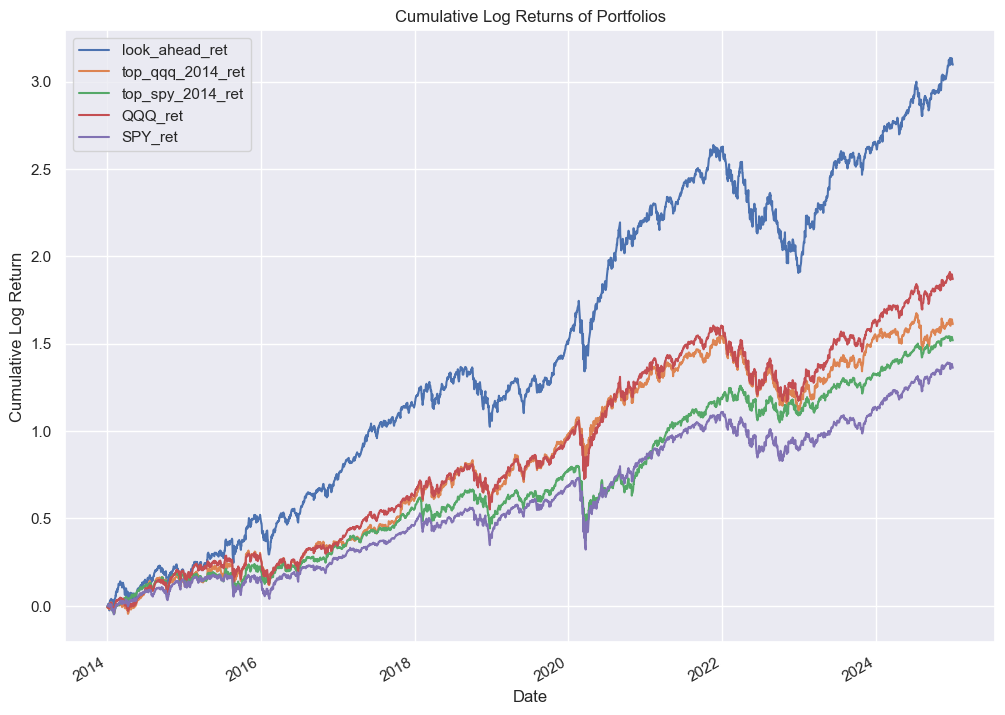

In [5]:
# Plot cumulative sum of portfolio returns
plt.figure(figsize=(12, 9))
for key in portfolio_returns:
    portfolio_returns[key].cumsum().plot(label=key)  # Cumsum of portfolio returns

plt.title("Cumulative Log Returns of Portfolios")
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.legend()
plt.grid(True)
plt.show()

### Strategy
Adjust the portfolio with the top 7 stocks of the previous year.

In [15]:
top_7_spy = pd.read_csv("top_7_spy.csv")
top_7_spy

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,MSFT,XOM,XOM,XOM,XOM,XOM,XOM,XOM,XOM,AAPL,...,AAPL,AAPL,AAPL,AAPL,MSFT,AAPL,AAPL,AAPL,AAPL,AAPL
1,XOM,MSFT,MSFT,MSFT,MSFT,WMT,MSFT,AAPL,AAPL,XOM,...,XOM,GOOG,GOOG,GOOG,AAPL,MSFT,MSFT,MSFT,MSFT,MSFT
2,PFE,C,C,C,GE,PG,WMT,MSFT,MSFT,GOOG,...,MSFT,MSFT,MSFT,MSFT,AMZN,GOOG,AMZN,GOOG,GOOG,GOOG
3,C,GE,GE,GE,PG,MSFT,GOOG,BRK-B,CVX,WMT,...,BRK-B,BRK-B,BRK-B,AMZN,GOOG,AMZN,GOOG,AMZN,AMZN,AMZN
4,WMT,WMT,WMT,WMT,BRK-B,JNJ,AAPL,WMT,GOOG,MSFT,...,GOOG,XOM,XOM,META,BRK-B,META,META,TSLA,BRK-B,NVDA
5,INTC,BAC,BAC,BAC,GOOG,BRK-B,JNJ,GOOG,IBM,BRK-B,...,JNJ,AMZN,AMZN,BRK-B,META,BRK-B,TSLA,META,UNH,META
6,GE,PFE,JNJ,PG,CVX,CVX,PG,CVX,WMT,CVX,...,WFC,META,META,JNJ,JNJ,JPM,BRK-B,NVDA,JNJ,TSLA


In [7]:
unique_tickers = set(top_7_spy.values.flatten())
unique_tickers

{'AAPL',
 'AMZN',
 'BAC',
 'BRK-B',
 'C',
 'CVX',
 'GE',
 'GOOG',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'META',
 'MSFT',
 'NVDA',
 'PFE',
 'PG',
 'TSLA',
 'UNH',
 'WFC',
 'WMT',
 'XOM'}

In [8]:
strategy_ret= get_log_ret(get_adj_close(get_data(unique_tickers, start, end)))

[*********************100%***********************]  22 of 22 completed


,AAPL,AMZN,BAC,BRK-B,C,CVX,GE,GOOG,IBM,INTC,...,META,MSFT,NVDA,PFE,PG,TSLA,UNH,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,-0.022211,-0.003852,0.019071,0.000596,0.021388,0.001690,-0.000727,-0.007322,0.005965,-0.000388,...,-0.002745,-0.006751,-0.012052,0.001967,-0.001118,-0.003604,0.007082,0.007083,-0.003300,-0.002409
2014-01-06,0.005438,-0.007113,0.015120,-0.011033,0.007649,-0.002657,-0.008038,0.011088,-0.003435,-0.012490,...,0.047253,-0.021359,0.013312,0.000983,0.002359,-0.017265,-0.011517,0.001762,-0.005610,0.001506
2014-01-07,-0.007177,0.011116,-0.009650,-0.000774,0.006852,0.008430,0.001100,0.019095,0.019750,0.005093,...,0.012509,0.007720,0.016240,0.006200,0.009627,0.015927,0.030118,-0.000440,0.003064,0.014049
2014-01-08,0.006313,0.009726,0.004837,-0.007343,0.011561,-0.014334,-0.002936,0.002079,-0.009214,-0.006272,...,0.005338,-0.018013,0.013539,0.006808,-0.014599,0.012773,-0.011701,0.011388,-0.007934,-0.003270
2014-01-09,-0.012853,-0.002267,0.014966,-0.000173,0.007090,0.000000,0.000367,-0.009677,-0.003144,-0.004730,...,-0.017497,-0.006453,-0.037999,-0.000647,0.002241,-0.025101,0.006065,0.005213,0.003335,-0.009776


In [9]:
def calculate_portfolio_returns(top_7_spy, strategy_ret, start, end):
    """
    Calculate the cumulative returns for an equal-weighted portfolio of the top 7 stocks each year.

    Parameters:
    - top_7_spy: DataFrame containing the top 7 stocks for each year (rows: years, columns: tickers).
    - strategy_ret: DataFrame containing the return data for each ticker (rows: dates, columns: tickers).

    Returns:
    - strat_cumsum: Series containing the cumulative returns of the portfolio.
    """
    # Initialize portfolio returns dictionary
    port_ret = {}

    # Calculate annual portfolio returns
    for year in range(pd.to_datetime(start).year - 1, pd.to_datetime(end).year + 1):
        prev_year = year - 1
        
        # Get previous year's constituents
        try:
            constituents = top_7_spy[str(prev_year)].dropna().tolist()
        except KeyError:
            print(f"Missing data for {prev_year}")
            continue
        
        # Filter valid tickers with available data
        valid_tickers = [t for t in constituents if t in strategy_ret.columns]
        
        if not valid_tickers:
            print(f"No valid tickers for {year}")
            continue
            
        # Get relevant returns for the year
        yr_returns = strategy_ret.loc[f"{year}-01-01":f"{year}-12-31", valid_tickers]
        
        # Calculate equal-weighted portfolio returns
        weights = np.ones(len(valid_tickers)) / 7  # 1/7 weight per stock
        portfolio = yr_returns.dot(weights)
        
        # Store cumulative returns
        port_ret[year] = portfolio.sum()

    # Convert to cumulative returns
    strat_cumsum = pd.Series(port_ret).cumsum().rename('Cumulative Log Return')
    
    return strat_cumsum

In [10]:
strat_spy_cumsum = calculate_portfolio_returns(top_7_spy, strategy_ret, start, end)

In [11]:
top_7_qqq = pd.read_csv("top_7_qqq.csv")
unique_tickers = set(top_7_qqq .values.flatten())
strategy_ret = get_log_ret(get_adj_close(get_data(unique_tickers, start, end)))

strat_qqq_cumsum = calculate_portfolio_returns(top_7_qqq, strategy_ret, start, end)

[*********************100%***********************]  11 of 11 completed
Missing data for 2012


In [12]:
strat_spy_cumsum.index = pd.to_datetime(strat_spy_cumsum.index, format='%Y')
# Shift the strat_cumsum index by one year if it's one year behind
strat_spy_cumsum.index = strat_spy_cumsum.index + pd.DateOffset(years=1)

strat_qqq_cumsum.index = pd.to_datetime(strat_qqq_cumsum.index, format='%Y')
# Shift the strat_cumsum index by one year if it's one year behind
strat_qqq_cumsum.index = strat_qqq_cumsum.index + pd.DateOffset(years=1)

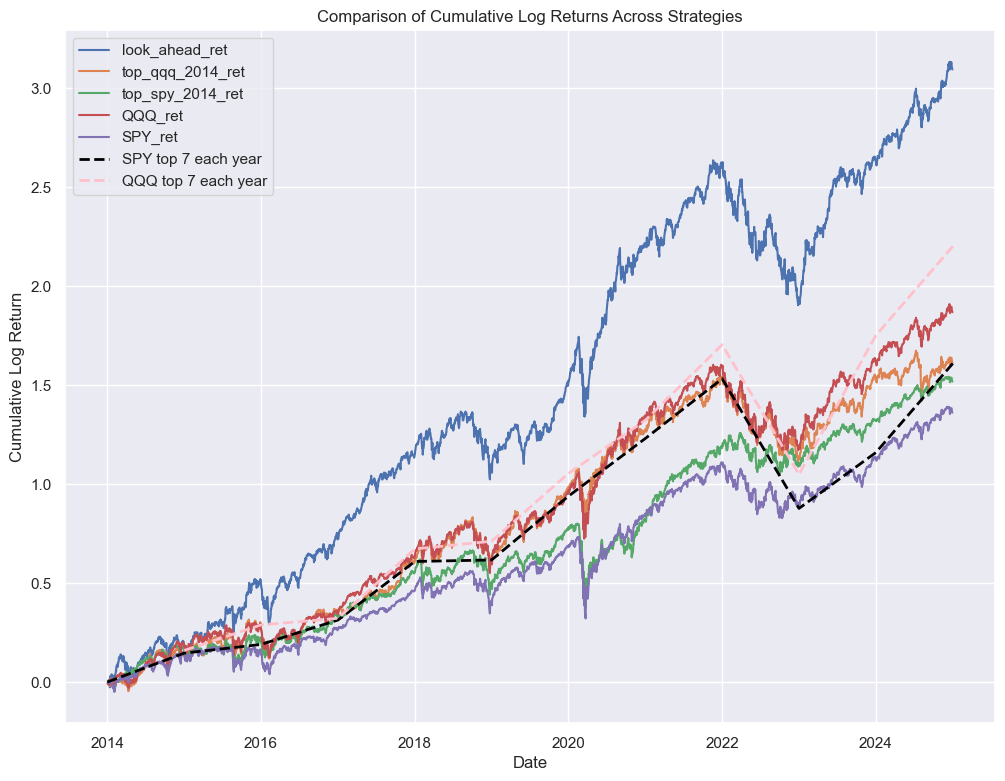

In [25]:
plt.figure(figsize=(12, 9))

# Plot all cumulative returns from portfolio_returns dictionary
for key in portfolio_returns:
    plt.plot(portfolio_returns[key].cumsum(), label=key)  

# Plot strat_cumsum for comparison
plt.plot(strat_spy_cumsum, label="SPY top 7 each year", linewidth=2, linestyle="--", color="black")

# Plot strat_cumsum for comparison
plt.plot(strat_qqq_cumsum, label="QQQ top 7 each year", linewidth=2, linestyle="--", color="pink")

# Formatting
plt.title("Comparison of Cumulative Log Returns Across Strategies")
plt.xlabel("Date")
plt.ylabel("Cumulative Log Return")
plt.legend()
plt.grid(True)

plt.savefig("Portfolio Comparison 2014-2024.png", bbox_inches="tight")
plt.show()

In [30]:
for key in portfolio_returns:
    print(f"{key} Portfolio Return is: {portfolio_returns[key].cumsum()[-1]}")
print(f"SPY top 7 each year Portfolio Return is: {strat_spy_cumsum[-1]}")
print(f"QQQ top 7 each year Portfolio Return is: {strat_qqq_cumsum[-1]}")

look_ahead_ret Portfolio Return is: 3.0960463770689386
top_qqq_2014_ret Portfolio Return is: 1.6113085459161818
top_spy_2014_ret Portfolio Return is: 1.5186900954750238
QQQ_ret Portfolio Return is: 1.8690319812868967
SPY_ret Portfolio Return is: 1.3615734951676812
SPY top 7 each year Portfolio Return is: 1.610183866256143
QQQ top 7 each year Portfolio Return is: 2.2019813311635614


In [38]:
after_tax = strat_qqq_cumsum[-1] - 0.068473
print(f"If we account for capital gains tax, QQQ top 7 each year Portfolio Return is: {after_tax}")
print(f"This strategy outperforms the QQQ index by: {after_tax - 1.869031981286896} in the span of ten years")

If we account for capital gains tax, QQQ top 7 each year Portfolio Return is: 2.1335083311635614
This strategy outperforms the QQQ index by: 0.26447634987666535 in the span of ten years


The capital gains tax for the strategy was calculated by adjusting the cumulative return of each sold stock by its weight and multiplying it by 15% which will be our rate. If a stock was sold and then bought back in another year we do the same calculation when we initialy fist sold + we multiply the difference from the year we bought until the year we sold. The sum will ammount to the value we need to subtrack from our total portfolio return.

In [23]:
for_tax_df = strategy_ret.cumsum().resample("Y").last()
for_tax_df

,AAPL,AMZN,CSCO,GILD,GOOG,INTC,META,MSFT,NVDA,ORCL,TSLA
Date,,,,,,,,,,,
2014-12-31,0.355072,-0.248676,0.258421,0.225773,-0.054714,0.372767,0.354919,0.250158,0.252166,0.184780,0.393221
2015-12-31,0.324472,0.529654,0.264597,0.308570,0.313810,0.350379,0.648670,0.454663,0.765682,-0.009182,0.469379
2016-12-31,0.442081,0.633523,0.405520,-0.014318,0.330718,0.434319,0.743320,0.595101,1.950350,0.057416,0.353225
2017-12-31,0.837255,1.077929,0.677593,0.014826,0.635077,0.703355,1.171048,0.936778,2.549120,0.280054,0.729616
2018-12-31,0.781846,1.328156,0.830929,-0.089644,0.624712,0.744751,0.873838,1.125706,2.180731,0.249909,0.796240
2019-12-31,1.418200,1.535396,0.960312,-0.013789,0.880165,1.012577,1.322182,1.580330,2.751388,0.426743,1.024969
2020-12-31,2.018720,2.102164,0.924825,-0.083144,1.150411,0.853713,1.608011,1.934741,3.550226,0.643875,3.157284
2021-12-31,2.316215,2.125653,1.301626,0.178874,1.652219,0.912478,1.816106,2.356583,4.363297,0.957878,3.561118
2022-12-31,2.009633,1.440172,1.047214,0.390994,1.163297,0.284319,0.788275,2.027736,3.664843,0.910305,2.510395


In [21]:
print(1/7)

0.14285714285714285
